In [1]:

import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split


In [2]:
titanic=pd.read_excel("titanicdata.xlsx")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

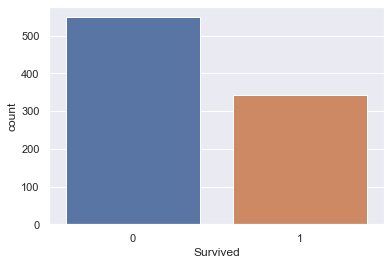

In [3]:
sns.countplot(x="Survived", data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

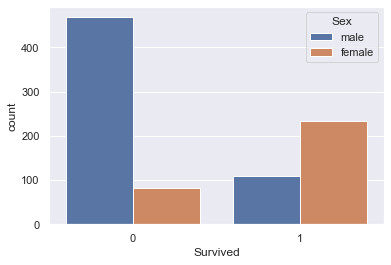

In [4]:
sns.countplot(x="Survived", hue="Sex" ,data=titanic)

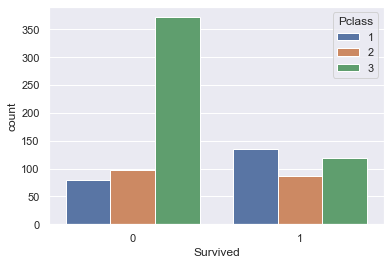

In [5]:
sns.countplot(x="Survived", hue="Pclass" ,data=titanic)
plt.show()

<AxesSubplot:ylabel='Frequency'>

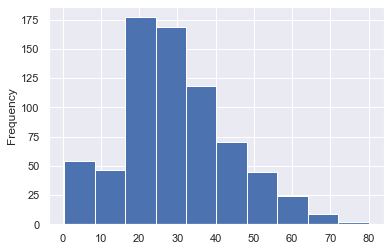

In [6]:
titanic['Age'].plot.hist()

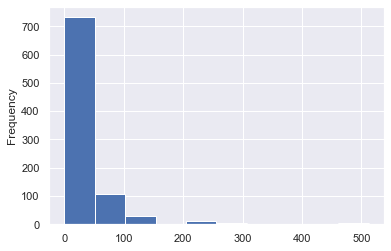

In [7]:
titanic['Fare'].plot.hist()
plt.show()

In [8]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.isnull().sum()             #including na

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

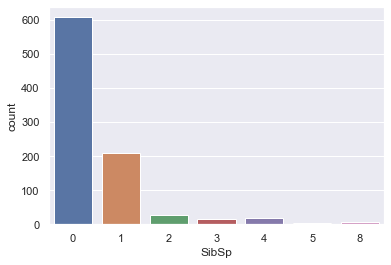

In [11]:
sns.countplot(x="SibSp",data=titanic)             # 0 is max as it concludes many were not having siblings or spouse use parch 

In [12]:
sns.heatmap(titanic.isnull(), yticklabels==False, cmap="viridis")

NameError: name 'yticklabels' is not defined

In [ ]:
sns.boxplot(x="Pclass",y="Age",data=titanic)

# data wrangling

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic.drop('Cabin',axis=1, inplace=True)

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic.dropna(inplace=True)             #true means we want to overwrite the existing dataframe

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
sns.heatmap(titanic.isnull() , yticklabel==False)

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
# while applying the algo. they will not take string values so making them as dummies

In [ ]:
pd.get_dummies(titanic['Sex'])

In [ ]:
# instead of creating dummies we can go by encoder method as well


In [ ]:
Sex=pd.get_dummies(titanic['Sex'], drop_first=True)    #female male as one col. male as 1 f as 0
Sex.head()

In [ ]:
pd.get_dummies(titanic['Embarked'])

In [ ]:
Embarked=pd.get_dummies(titanic['Embarked'],drop_first=True)
Embarked.head()

In [ ]:
Pclass=pd.get_dummies(titanic['Pclass'],drop_first=True) #if not included in 2,3 then for sure it will be in 1st class
Pclass.head()

In [ ]:
#concatinating all
titanic=pd.concat([titanic,Sex,Embarked, Pclass],axis=1)
titanic.head()

In [ ]:
titanic.drop(['PassengerId','Name','Sex','Ticket','Embarked','Pclass'],axis=1,inplace=True)

In [ ]:
titanic.head()

# TRAIN_TEST_SPLIT

In [ ]:
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)      
#RANDOM STATE WE ENTRY SO THAT IT TAKE SAME SAMPLE EVERYTIME

In [ ]:
y_train.value_counts(normalize=True)        #normalise returns percentage i.e 59% o and 40% 1

In [ ]:
y_test.value_counts(normalize=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_predicted=clf.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predicted)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)*100

# DECISION TREE ALGO.


In [ ]:
titanic.head()

In [ ]:
titanic.drop(['Parch'],axis=1,inplace=True)

In [ ]:
titanic.head()

In [ ]:
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

In [ ]:
model.score(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
y_predicted=model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predicted)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)